In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
# import tensorflow as tf
from six.moves import cPickle as pickle
import pickle
import os
from sklearn.tree import DecisionTreeClassifier


%matplotlib inline

In [2]:
cd Data/HumanRobot/


/home/ares/Dropbox/Phd/AdaFT/Data/HumanRobot


In [3]:
ls

copies_v1_ada.csv       taaf_v2_ada.csv       xs_v1_all_on.csv
copies_v1_all_on.csv    taaf_v2_all_on.csv    xs_v2_ada.csv
copies_v2_ada.csv       taaf_vmix_ada.csv     xs_v2_all_on.csv
copies_v2_all_on.csv    taaf_vmix_all_on.csv  xs_vmix_ada.csv
copies_vmix_ada.csv     temp_v1_ada.csv       xs_vmix_all_on.csv
copies_vmix_all_on.csv  temp_v1_all_on.csv    xtrack_v1_ada.csv
labelded_sss_robot.csv  temp_v2_ada.csv       xtrack_v1_all_on.csv
subspaces1.csv          temp_v2_all_on.csv    xtrack_v2_ada.csv
subspaces2.csv          temp_vmix_ada.csv     xtrack_v2_all_on.csv
taaf_v1_ada.csv         temp_vmix_all_on.csv  xtrack_vmix_ada.csv
taaf_v1_all_on.csv      xs_v1_ada.csv         xtrack_vmix_all_on.csv


In [28]:
taaf_v1_ada = pd.read_csv('taaf_v1_ada.csv')
taaf_v1_all_on = pd.read_csv('taaf_v1_all_on.csv')
taaf_v2_ada = pd.read_csv('taaf_v2_ada.csv')
taaf_v2_all_on = pd.read_csv('taaf_v2_all_on.csv')
taaf_vmix_ada = pd.read_csv('taaf_vmix_ada.csv')
taaf_vmix_all_on = pd.read_csv('taaf_vmix_all_on.csv')

temp_v1_ada = pd.read_csv('temp_v1_ada.csv')
temp_v1_all_on = pd.read_csv('temp_v1_all_on.csv')
temp_v2_ada = pd.read_csv('temp_v2_ada.csv')
temp_v2_all_on = pd.read_csv('temp_v2_all_on.csv')
temp_vmix_ada = pd.read_csv('temp_vmix_ada.csv')
temp_vmix_all_on = pd.read_csv('temp_vmix_all_on.csv')

xs_v1_ada = pd.read_csv('xs_v1_ada.csv')
xs_v1_all_on = pd.read_csv('xs_v1_all_on.csv')
xs_v2_ada = pd.read_csv('xs_v2_ada.csv')
xs_v2_all_on = pd.read_csv('xs_v2_all_on.csv')
xs_vmix_ada = pd.read_csv('xs_vmix_ada.csv')
xs_vmix_all_on = pd.read_csv('xs_vmix_all_on.csv')

xtract_v1_ada = pd.read_csv('xtrack_v1_ada.csv')
xtrack_v1_all_on = pd.read_csv('xtrack_v1_all_on.csv')
xtrack_v2_ada = pd.read_csv('xtrack_v2_ada.csv')
xtrack_v2_all_on = pd.read_csv('xtrack_v2_all_on.csv')
xtrack_vmix_ada = pd.read_csv('xtrack_vmix_ada.csv')
xtrack_vmix_all_on = pd.read_csv('xtrack_vmix_all_on.csv')

copies_v1_ada = pd.read_csv('copies_v1_ada.csv')
copies_v1_all_on = pd.read_csv('copies_v1_all_on.csv')
copies_v2_ada = pd.read_csv('copies_v2_ada.csv')
copies_v2_all_on = pd.read_csv('copies_v2_all_on.csv')
copies_vmix_ada = pd.read_csv('copies_vmix_ada.csv')
copies_vmix_all_on = pd.read_csv('copies_vmix_all_on.csv')

In [15]:
taaf_v1 = pd.concat([taaf_v1_all_on, taaf_v1_ada], axis=1)
taaf_v1.columns = ['TAAF Version 1 All On', 'TAAF Version 1 AdaFT']
taaf_v2 = pd.concat([taaf_v2_all_on, taaf_v2_ada], axis=1)
taaf_v2.columns = ['TAAF Version 2 All On', 'TAAF Version 2 AdaFT']
taaf_vmix = pd.concat([taaf_vmix_all_on, taaf_vmix_ada], axis=1)
taaf_vmix.columns = ['TAAF Version Mix All On', 'TAAF Version Mix AdaFT']

In [17]:
taaf_ada = pd.concat([taaf_v1_ada, taaf_v2_ada, taaf_vmix_ada], axis = 1)
taaf_ada.columns=['TAAF Version 1 AdaFT', 'TAAF Version 2 AdaFT', 'TAAF Version Mix AdaFT']
taaf_all_on = pd.concat([taaf_v1_all_on, taaf_v2_all_on, taaf_vmix_all_on], axis = 1)
taaf_all_on.columns=['TAAF Version 1 All On', 'TAAF Version 2 All On', 'TAAF Version Mix All On']

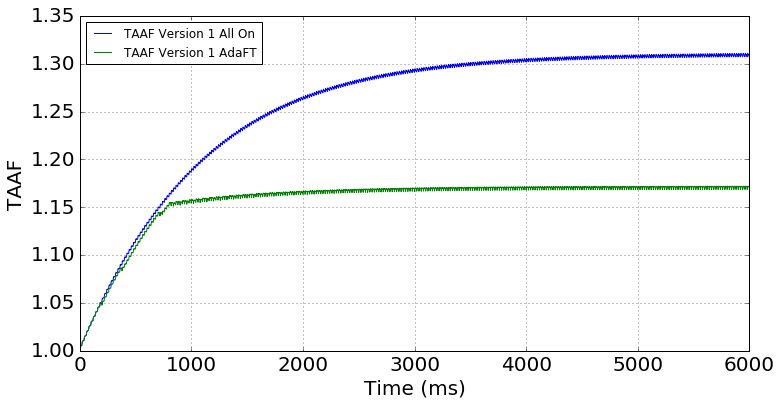

In [37]:
taaf_v1.plot(grid=True, figsize=(12, 6), fontsize=20)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('TAAF', fontsize=20)

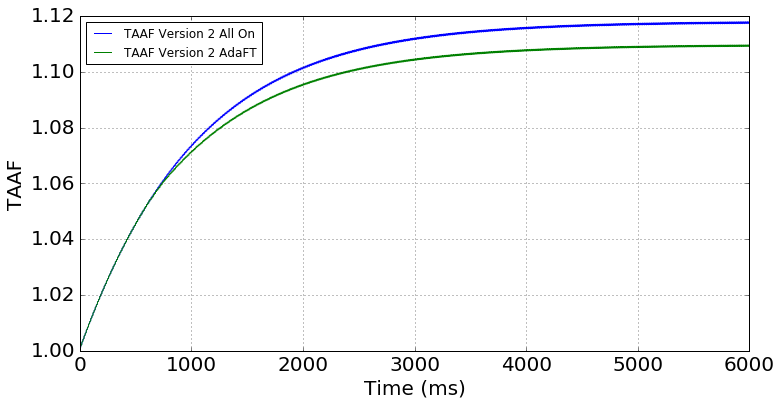

In [38]:
taaf_v2.plot(grid=True, figsize=(12, 6), fontsize=20)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('TAAF', fontsize=20)

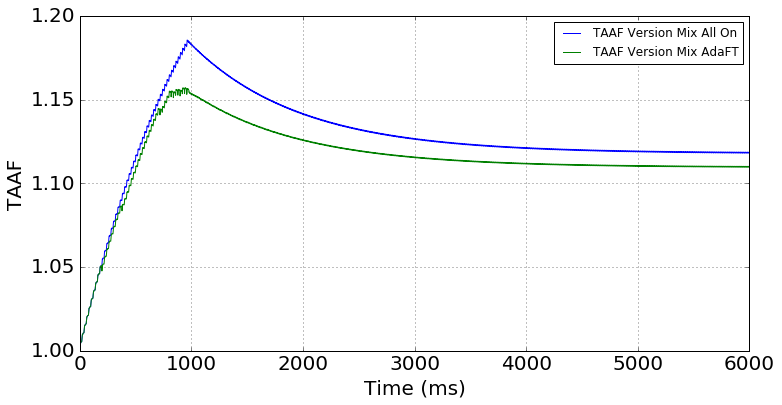

In [39]:
taaf_vmix.plot(grid=True, figsize=(12, 6), fontsize=20)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('TAAF', fontsize=20)

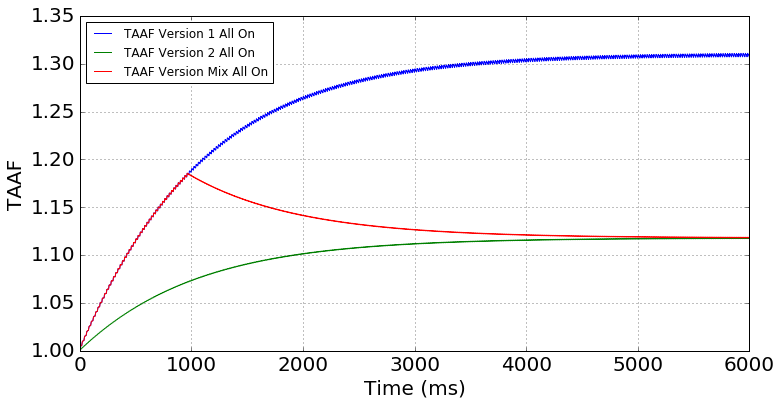

In [40]:
taaf_all_on.plot(grid=True, figsize=(12, 6), fontsize=20)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('TAAF', fontsize=20)

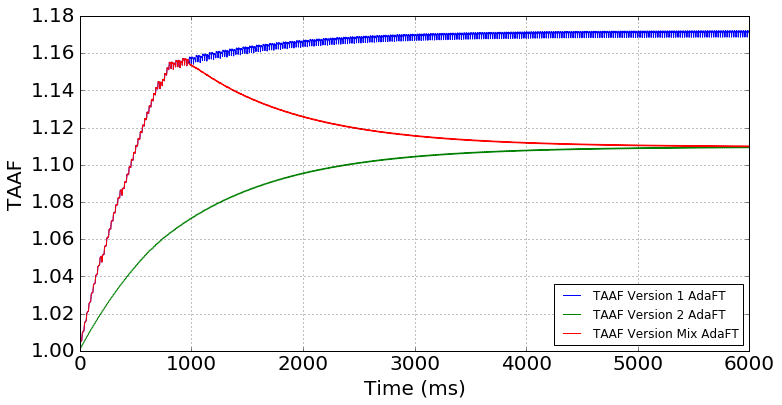

In [41]:
taaf_ada.plot(grid=True, figsize=(12, 6), fontsize=20)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('TAAF', fontsize=20)